# Importar Librerías Necesarias
Importar las librerías necesarias

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Cargar Conjunto de Datos
Cargar el conjunto de datos Global_Health_Statistics.csv en un DataFrame de pandas.

In [194]:
# Cargar el conjunto de datos Global_Health_Statistics.csv
df = pd.read_csv('/home/feliciano/PIA/Proyecto_Analisis/data.csv')
# Mostrar las primeras filas del DataFrame
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


# Acerca del dataset

El conjunto de datos de la Población de Vehículos Eléctricos proporciona información detallada sobre la distribución y las características de los vehículos eléctricos (EV) en diversas regiones.

## Casos de Uso del Conjunto de Datos

Este conjunto de datos puede ser utilizado para:

- Realizar un análisis exploratorio de datos (EDA) para entender el conjunto de datos.

- Predecir el tipo de vehículo eléctrico basándose en sus diversas características.

# Exploración Inicial de Datos

#### Lo primero que haremos sera borrar las columnas que no nos sirvan o sean redudantes a la hora de realizar mi analisis

- 'VIN (1-10):':

    Razón para eliminar: Aunque es útil para identificar vehículos de forma única, no aporta valor directo al análisis general


- 'DOL Vehicle ID':

    Razón para eliminar: Similar al VIN, es un identificador único que no contribuye al análisis descriptivo


- '2020 Census Tract':

    Razón para eliminar: Esta columna es útil solo si planeas un análisis muy detallado basado en datos censales.

- 'CAFV':

    Razón para eliminar: tiene valores repetitivos y no añade información significativa al análisis básico


- 'Postal Code':

    Razón para eliminar: Ya tenemos información geográfica más amplia con County, City, y State.
    

- 'Urbanization Rate (%)':

    Razon para eliminar: Tiene correlaciones muy bajas con la mayoría de las métricas de salud (prevalencia, incidencia, mortalidad).

- 'Legislative District':

    Razón para eliminar: No entra dentro de nuestro analisis el analizar las regulaciones locales.
    

- 'Base MSRP':

    Razon para eliminar: Todos los valores se muestran en 0.0, lo que indica que no aporta información útil para este análisis.

In [195]:
# Eliminar las columnas especificadas
columnas_a_eliminar = ['VIN (1-10)', 'DOL Vehicle ID', '2020 Census Tract', 'CAFV','Postal Code','Legislative District','Base MSRP', 'Electric Utility']
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificar los cambios
df.head()

,County,City,State,Model Year,Make,Model,E.V_Type,Electric Range,Vehicle Location
0,Kitsap,Seabeck,WA,2023,TOYOTA,RAV4 PRIME,PHEV,42.0,POINT (-122.8728334 47.5798304)
1,Kitsap,Bremerton,WA,2018,NISSAN,LEAF,BEV,151.0,POINT (-122.6961203 47.5759584)
2,King,Seattle,WA,2020,TESLA,MODEL 3,BEV,266.0,POINT (-122.3340795 47.6099315)
3,King,Seattle,WA,2014,NISSAN,LEAF,BEV,84.0,POINT (-122.304356 47.715668)
4,Thurston,Yelm,WA,2017,CHEVROLET,BOLT EV,BEV,238.0,POINT (-122.5715761 46.9095798)


##### Analizamos el dataset columna a columna para verificar que los datos estan correctamente y no hay valores faltantes

In [196]:
# Analizar la columna 'County'
print("Valores únicos en 'County':", df['County'].nunique())
print("Valores faltantes en 'County':", df['County'].isnull().sum())
print("Tipos de datos en 'County':", df['County'].dtype)

Valores únicos en 'County': 205
Valores faltantes en 'County': 3
Tipos de datos en 'County': object


In [197]:
# Analizar la columna 'City'
print("Valores únicos en 'City':", df['City'].nunique())
print("Valores faltantes en 'City':", df['City'].isnull().sum())
print("Tipos de datos en 'City':", df['City'].dtype)

Valores únicos en 'City': 770
Valores faltantes en 'City': 3
Tipos de datos en 'City': object


In [198]:
# Analizar la columna 'State'
print("Valores únicos en 'State':", df['State'].nunique())
print("Valores faltantes en 'State':", df['State'].isnull().sum())
print("Tipos de datos en 'State':", df['State'].dtype)

Valores únicos en 'State': 45
Valores faltantes en 'State': 0
Tipos de datos en 'State': object


In [199]:
# Analizar la columna 'Model Year'
print("Valores únicos en 'Model Year':", df['Model Year'].nunique())
print("Valores faltantes en 'Model Year':", df['Model Year'].isnull().sum())
print("Tipos de datos en 'Model Year':", df['Model Year'].dtype)

Valores únicos en 'Model Year': 22
Valores faltantes en 'Model Year': 0
Tipos de datos en 'Model Year': int64


In [200]:
# Analizar la columna 'Make'
print("Valores únicos en 'Make':", df['Make'].nunique())
print("Valores faltantes en 'Make':", df['Make'].isnull().sum())
print("Tipos de datos en 'Make':", df['Make'].dtype)

Valores únicos en 'Make': 42
Valores faltantes en 'Make': 0
Tipos de datos en 'Make': object


In [201]:
# Analizar la columna 'Model'
print("Valores únicos en 'Model':", df['Model'].nunique())
print("Valores faltantes en 'Model':", df['Model'].isnull().sum())
print("Tipos de datos en 'Model':", df['Model'].dtype)

Valores únicos en 'Model': 152
Valores faltantes en 'Model': 1
Tipos de datos en 'Model': object


In [202]:
# Analizar la columna 'E.V_Type'
print("Valores únicos en 'E.V_Type':", df['E.V_Type'].nunique())
print("Valores faltantes en 'E.V_Type':", df['E.V_Type'].isnull().sum())
print("Tipos de datos en 'E.V_Type':", df['E.V_Type'].dtype)

Valores únicos en 'E.V_Type': 2
Valores faltantes en 'E.V_Type': 0
Tipos de datos en 'E.V_Type': object


In [203]:
# Analizar la columna 'Electric Range'
print("Valores únicos en 'Electric Range':", df['Electric Range'].nunique())
print("Valores faltantes en 'Electric Range':", df['Electric Range'].isnull().sum())
print("Tipos de datos en 'Electric Range':", df['Electric Range'].dtype)

Valores únicos en 'Electric Range': 105
Valores faltantes en 'Electric Range': 8
Tipos de datos en 'Electric Range': float64


In [204]:
# Analizar la columna 'Vehicle Location'
print("Valores únicos en 'Vehicle Location':", df['Vehicle Location'].nunique())
print("Valores faltantes en 'Vehicle Location':", df['Vehicle Location'].isnull().sum())
print("Tipos de datos en 'Vehicle Location':", df['Vehicle Location'].dtype)

Valores únicos en 'Vehicle Location': 928
Valores faltantes en 'Vehicle Location': 8
Tipos de datos en 'Vehicle Location': object


#### Una vez hemos verificado cada columna, hacemos el .info para ver la información sobre el tipo de datos y el tamaño de cada una de las columnas

In [205]:
# Mostrar información sobre el DataFrame, incluyendo tipos de datos y conteo de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   County            205436 non-null  object 
 1   City              205436 non-null  object 
 2   State             205439 non-null  object 
 3   Model Year        205439 non-null  int64  
 4   Make              205439 non-null  object 
 5   Model             205438 non-null  object 
 6   E.V_Type          205439 non-null  object 
 7   Electric Range    205431 non-null  float64
 8   Vehicle Location  205431 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.1+ MB


#### Vamos a categorizar las siguientes columnas
- Las categorizamos por que:

    Contienen datos cualitativos que representan categorías o grupos específicos.

In [206]:
# Convertir columnas a categórias
categorical_columns = ['County','City','State','Make','Model','E.V_Type','Vehicle Location']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [207]:
df.head()

,County,City,State,Model Year,Make,Model,E.V_Type,Electric Range,Vehicle Location
0,Kitsap,Seabeck,WA,2023,TOYOTA,RAV4 PRIME,PHEV,42.0,POINT (-122.8728334 47.5798304)
1,Kitsap,Bremerton,WA,2018,NISSAN,LEAF,BEV,151.0,POINT (-122.6961203 47.5759584)
2,King,Seattle,WA,2020,TESLA,MODEL 3,BEV,266.0,POINT (-122.3340795 47.6099315)
3,King,Seattle,WA,2014,NISSAN,LEAF,BEV,84.0,POINT (-122.304356 47.715668)
4,Thurston,Yelm,WA,2017,CHEVROLET,BOLT EV,BEV,238.0,POINT (-122.5715761 46.9095798)


#### Procedemos a ver un resumen de los datos, con describe

In [208]:
df.describe()

,Model Year,Electric Range
count,205439.000000,205431.000000
mean,2020.960363,52.164342
std,2.989059,88.075859
min,1997.000000,0.000000
25%,2019.000000,0.000000
50%,2022.000000,0.000000
75%,2023.000000,48.000000
max,2025.000000,337.000000


#### Descripción de las columnas tipo categórico y object, mostrando la cantidad con count y las opciones unicas de las columna junto con la frecuencia

In [209]:
# Mostrar estadísticas básicas del DataFrame
df.describe()
df.describe(include=['category'])

,County,City,State,Make,Model,E.V_Type,Vehicle Location
count,205436,205436,205439,205439,205438,205439,205431
unique,205,770,45,42,152,2,928
top,King,Seattle,WA,TESLA,MODEL Y,BEV,POINT (-122.1207376 47.6705374)
freq,105237,33328,204997,90318,43437,161539,5203


# Análisis de Calidad de Datos y su Procesamiento
#### Analizar la calidad de los datos verificando valores faltantes, entradas duplicadas, tipos de datos inconsistentes y sus respectivas soluciones.

#### Anteriormente hemos visto que habia valores faltantes en nuestro dataset, por lo tanto vamos a rellenar esos valores por 'Desconocido'

In [210]:
# Agregar la categoría "Desconocido" a las columnas categóricas
for col in categorical_columns:
	df[col] = df[col].cat.add_categories("Desconocido")

# Rellenar valores faltantes con "Desconocido"
df.fillna("Desconocido", inplace=True)

#### Arriba anteriormente verificamos si habian valores faltantes pero lo volvemos a comprobar

In [211]:
# Verificar valores faltantes en el DataFrame
valores_faltantes = df.isnull().sum()
print("Valores faltantes en cada columna:\n", valores_faltantes)

Valores faltantes en cada columna:
 County              0
City                0
State               0
Model Year          0
Make                0
Model               0
E.V_Type            0
Electric Range      0
Vehicle Location    0
dtype: int64


#### Comprobamos si hay alguna entrada duplicada en nuestro dataset 

In [212]:
# Verificar entradas duplicadas en el DataFrame
entradas_duplicadas = df.duplicated().sum()
print("Número de entradas duplicadas:", entradas_duplicadas)

Número de entradas duplicadas: 149150


In [213]:
# Eliminar entradas duplicadas
df.drop_duplicates(inplace=True)

# Verificar los cambios
print("Número de entradas duplicadas después de la eliminación:", df.duplicated().sum())

Número de entradas duplicadas después de la eliminación: 0


In [214]:
# Verificar valores únicos por columna
print("Valores únicos por columna:")
for columna in df.columns:
    print(f"{columna}: {df[columna].nunique()}")

Valores únicos por columna:
County: 206
City: 771
State: 45
Model Year: 22
Make: 42
Model: 153
E.V_Type: 2
Electric Range: 106
Vehicle Location: 929


#### Identificar valores atípicos (outliers)

In [215]:
# Función para encontrar outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return ((columna < limite_inferior) | (columna > limite_superior)).sum()

# Aplicar a todas las columnas numéricas
print("Valores atípicos por columna numérica:")
for columna in df.select_dtypes(include='number').columns:
    outliers = detectar_outliers(df[columna])
    print(f"{columna}: {outliers}")

Valores atípicos por columna numérica:
Model Year: 54


In [216]:
# Verificar los valores únicos y rango de 'Model Year'
print(df['Model Year'].describe())
print(df['Model Year'].unique())

# Definir el rango esperado
limite_inferior = 1990
limite_superior = 2024

# Identificar valores atípicos
valores_atipicos = df[(df['Model Year'] < limite_inferior) | (df['Model Year'] > limite_superior)]
print(f"Valores atípicos en 'Model Year':\n{valores_atipicos}")


count    56289.000000
mean      2020.323260
std          3.345569
min       1997.000000
25%       2018.000000
50%       2021.000000
75%       2023.000000
max       2025.000000
Name: Model Year, dtype: float64
[2023 2018 2020 2014 2017 2022 2015 2013 2016 2024 2012 2019 2021 2025
 2011 2008 2010 2000 2002 1999 2003 1997]
Valores atípicos en 'Model Year':
           County           City State  Model Year    Make    Model E.V_Type  \
40           King        Seattle    WA        2025     BMW       X5     PHEV   
123        Chelan         Manson    WA        2025   VOLVO     XC90     PHEV   
159        Yakima         Yakima    WA        2025     BMW       X5     PHEV   
326          King        Seattle    WA        2025     BMW       IX      BEV   
331          King       Kirkland    WA        2025  RIVIAN      R1S      BEV   
...           ...            ...   ...         ...     ...      ...      ...   
201438  Jefferson    Port Ludlow    WA        2025     BMW       IX      BEV   
2031

#### Los valores atipicos que son los valores de 2025, ya que son modelos prelanzamientos o modelos que "pueden" salir a la venta en este 2025, en mi caso los voy a eliminar para quedarnos solo con los modelos de hasta 2024

In [217]:
df = df[df['Model Year'] <= 2024]

# Verificar los cambios
print(df['Model Year'].describe())

count    55964.000000
mean      2020.296101
std          3.336176
min       1997.000000
25%       2018.000000
50%       2021.000000
75%       2023.000000
max       2024.000000
Name: Model Year, dtype: float64


# Análisis Exploratorio de Datos

#### Mostramos la concentración de vehículos electricos en los últimos años. 
- Esto sugiere una adopción más reciente de vehículos eléctricos en comparación con los modelos más antiguos

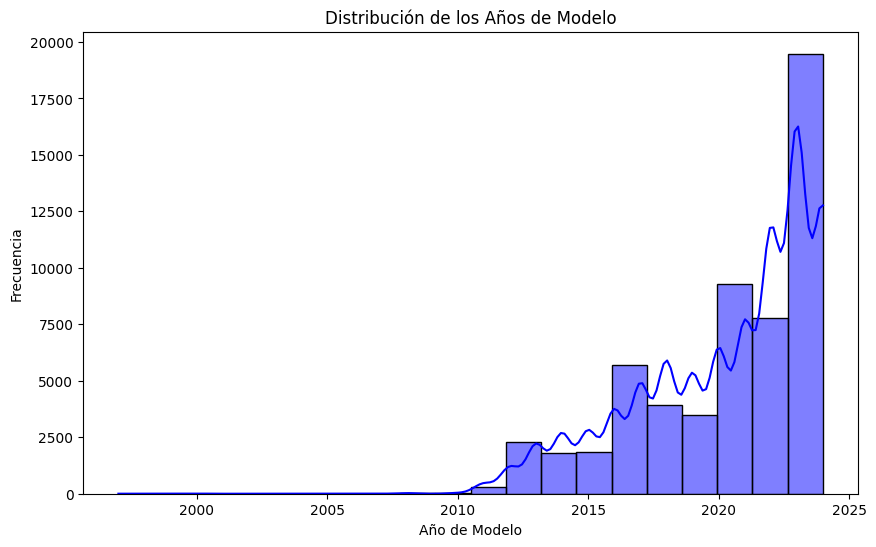

In [218]:
plt.figure(figsize=(10,6))
sns.histplot(df['Model Year'], kde=True, color='blue', bins=20)
plt.title('Distribución de los Años de Modelo')
plt.xlabel('Año de Modelo')
plt.ylabel('Frecuencia')
plt.show()

#### Este gráfico muestra que algunas marcas, como Tesla seguida de chevrolet, tienen una mayor presencia de vehículos eléctricos, lo que indica que estas marcas son más prominentes en la industria de los vehículos eléctricos.

- Destacar que Tesla genero mucha diferencia con otras marcas en cuanto a modelos de coches electricos

- Destacar negativamente que marcas como AUDI, ALFA ROMEO, MERCEDES, MAZDA O MINI, han tenido muchisima menos presencia en coches electricos en comparacion con las otras marcas siendo estas, muy grandes en el sector

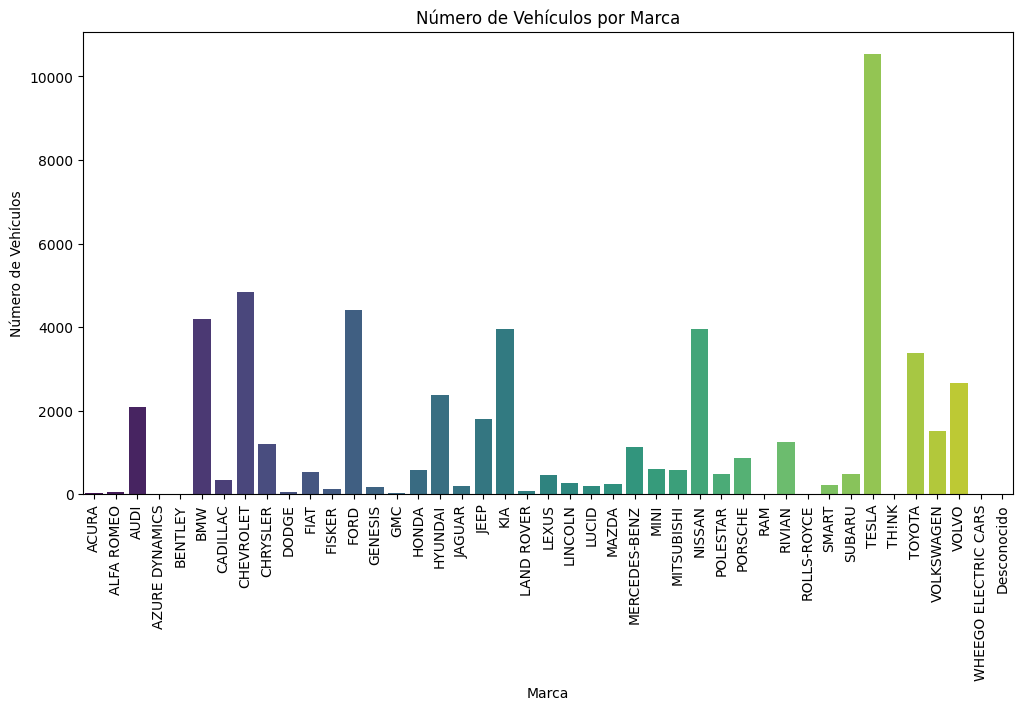

In [219]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Make', palette='viridis')
plt.title('Número de Vehículos por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=90)
plt.show()

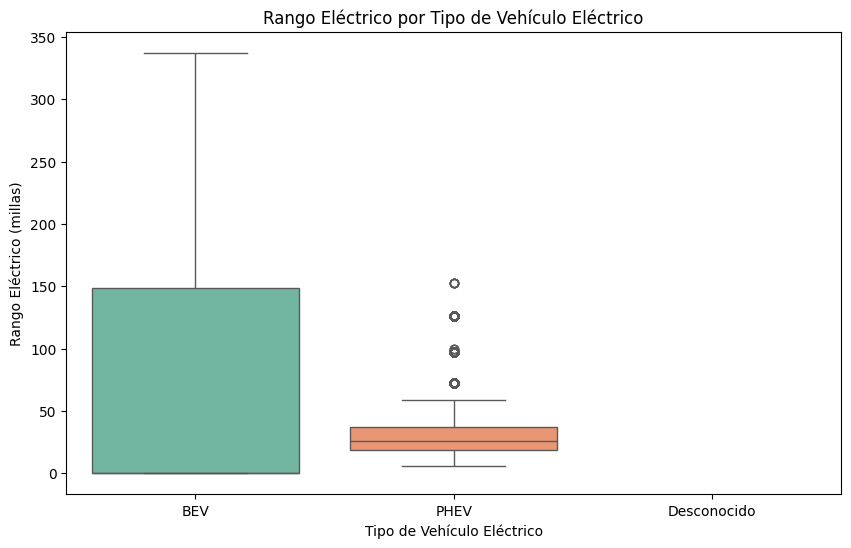

In [220]:
# Convertir la columna 'Electric Range' a numérica, convirtiendo los errores a NaN
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='E.V_Type', y='Electric Range', palette='Set2')
plt.title('Rango Eléctrico por Tipo de Vehículo Eléctrico')
plt.xlabel('Tipo de Vehículo Eléctrico')
plt.ylabel('Rango Eléctrico (millas)')
plt.show()

#### En el siguiente vemos que el rango eléctrico ha mejorado en los últimos años, especialmente para los vehículos BEV(Battery Electric Vehicle). Esto sugiere avances tecnológicos y mejoras en las baterías de los vehículos eléctricos.

El máximo de Electric Range para BEV es: 337.0
El máximo de Electric Range para PHEV es: 153.0


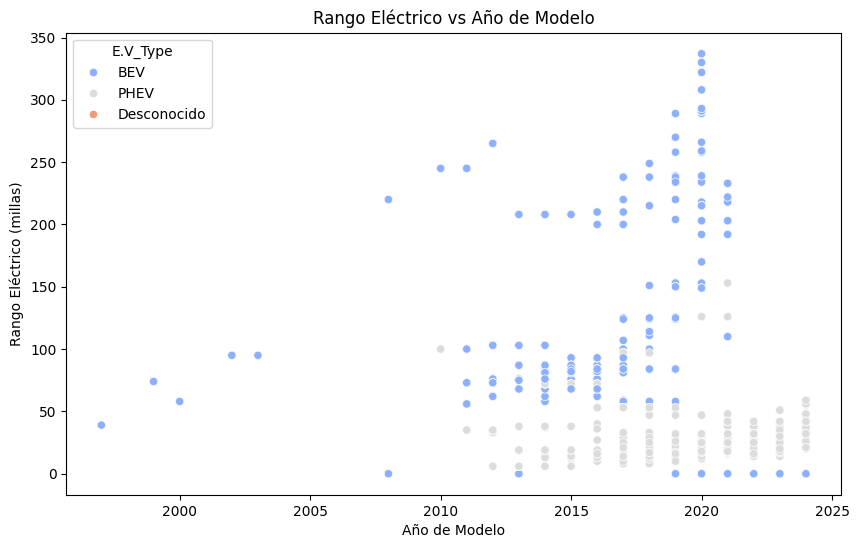

In [221]:
# Obtener el máximo de Electric Range para BEV y PHEV
max_bev = df[df['E.V_Type'] == 'BEV']['Electric Range'].max()
max_phev = df[df['E.V_Type'] == 'PHEV']['Electric Range'].max()

print(f"El máximo de Electric Range para BEV es: {max_bev}")
print(f"El máximo de Electric Range para PHEV es: {max_phev}")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Model Year', y='Electric Range', hue='E.V_Type', palette='coolwarm')
plt.title('Rango Eléctrico vs Año de Modelo')
plt.xlabel('Año de Modelo')
plt.ylabel('Rango Eléctrico (millas)')
plt.show()

#### Este gráfico muestra cómo las marcas han ido lanzando modelos a lo largo de los años, con algunas marcas como CADILLAC,GENESIS,HYUNDAI,JEEP,LEXUS,SUBARU introduciendo vehículos más recientemente, mientras que otras tienen una gama más diversa de años de modelo

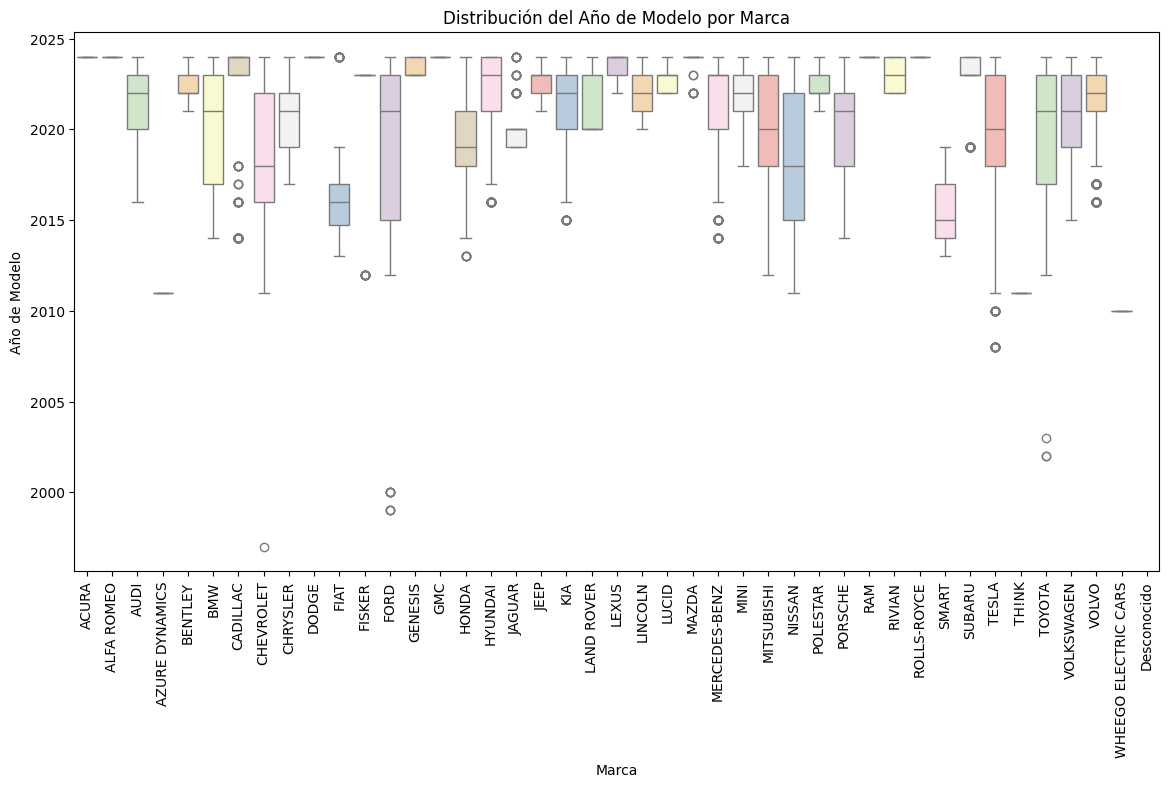

In [222]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='Make', y='Model Year', palette='Pastel1')
plt.title('Distribución del Año de Modelo por Marca')
plt.xlabel('Marca')
plt.ylabel('Año de Modelo')
plt.xticks(rotation=90)
plt.show()

#### En el siguiente grafico mostramos la comparacion del numero de vehiculos creados por año y su tipo.
- Los vehículos BEV son más prevalentes en los modelos más recientes, mientras que los PHEV tienen una distribución más amplia a lo largo de los años, lo que puede reflejar una transición gradual hacia vehículos completamente eléctricos

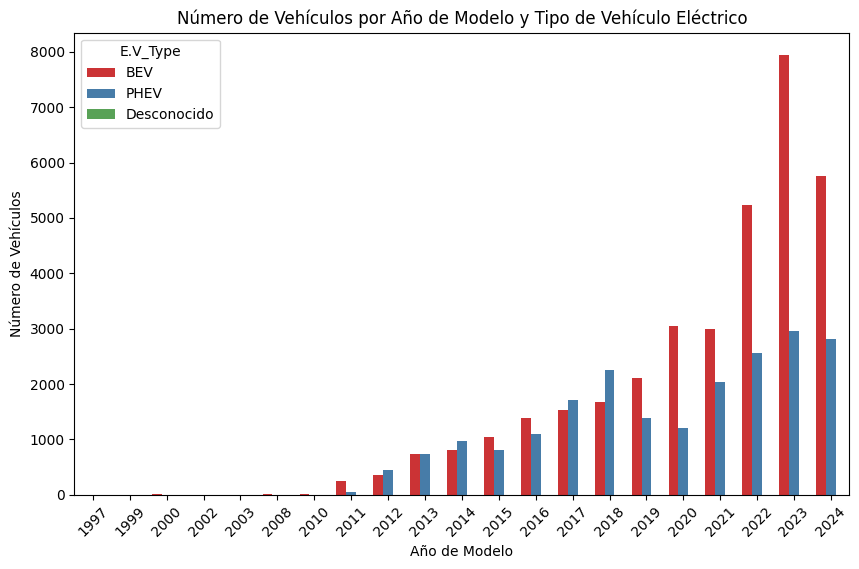

In [223]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Model Year', hue='E.V_Type', palette='Set1')
plt.title('Número de Vehículos por Año de Modelo y Tipo de Vehículo Eléctrico')
plt.xlabel('Año de Modelo')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.show()

#### El gráfico muestra diferencias significativas en el rango eléctrico entre las marcas, lo que indica que algunas marcas ofrecen vehículos con un mayor rendimiento en términos de autonomía, en comparación con otras marcas.

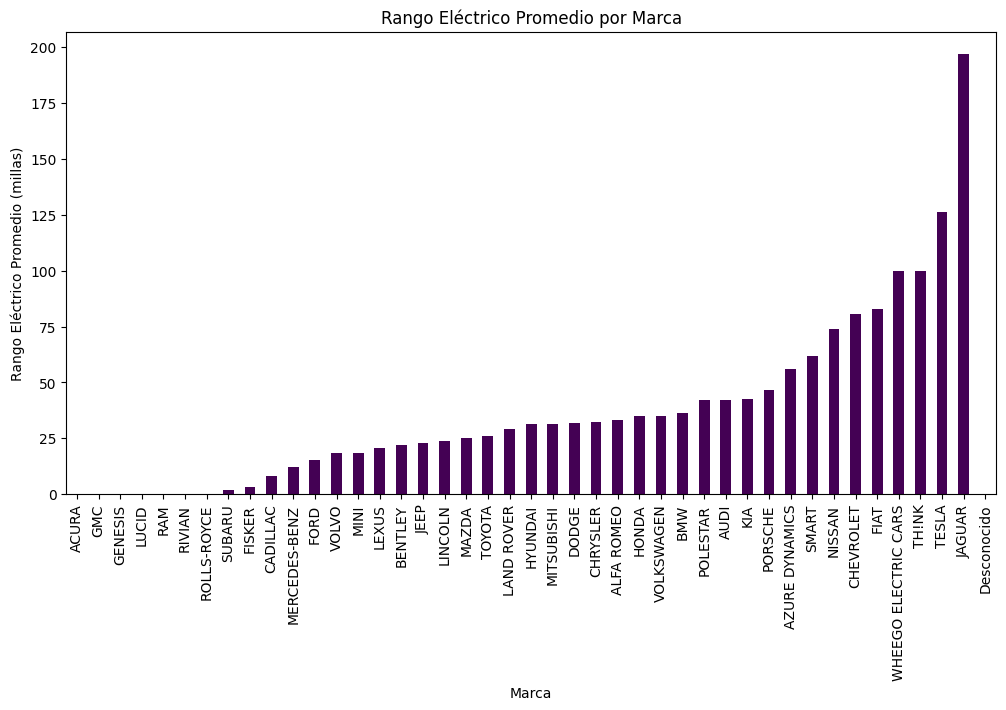

In [224]:
plt.figure(figsize=(12,6))
df.groupby('Make')['Electric Range'].mean().sort_values().plot(kind='bar', colormap='viridis')
plt.title('Rango Eléctrico Promedio por Marca')
plt.xlabel('Marca')
plt.ylabel('Rango Eléctrico Promedio (millas)')
plt.xticks(rotation=90)
plt.show()


#### Este gráfico permite comparar la distribución de BEV y PHEV dentro de cada marca. Algunas marcas, como Tesla, tienen una mayor proporción de vehículos BEV, otras como Ford tienen una mezcla de ambos tipos y Toyota tiene mayores proporciones de PHEV.

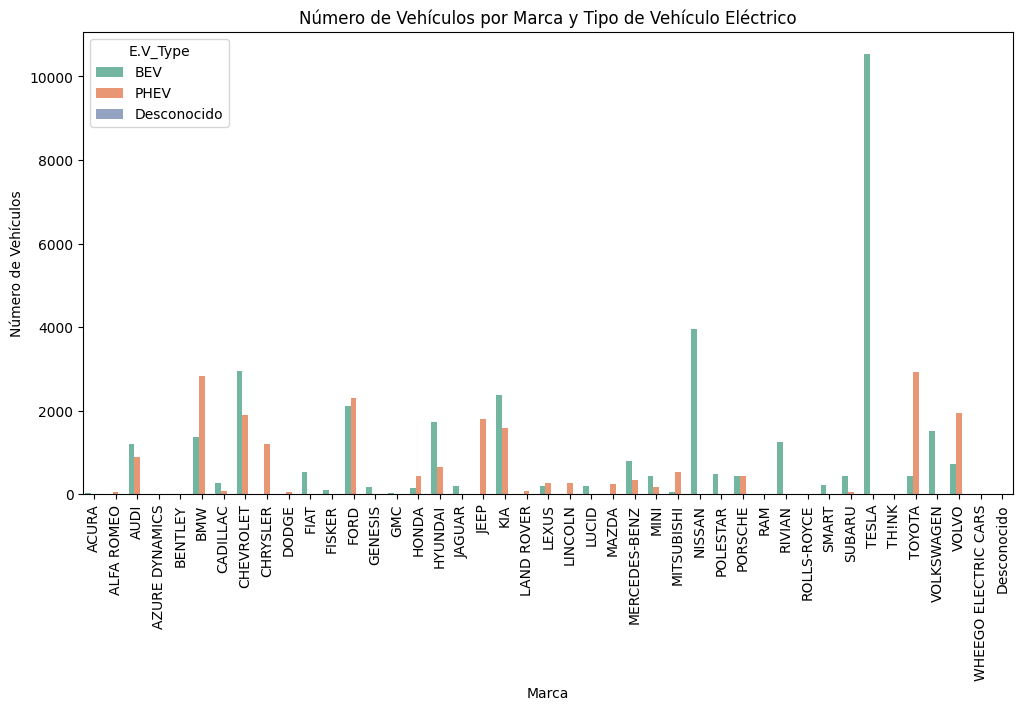

In [225]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Make', hue='E.V_Type', palette='Set2')
plt.title('Número de Vehículos por Marca y Tipo de Vehículo Eléctrico')
plt.xlabel('Marca')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=90)
plt.show()

### Conclusiones Finales

- Tipo de Vehículo Eléctrico: La diferencia en la distribución de BEV (Battery Electric Vehicles) y PHEV (Plug-in Hybrid Electric Vehicles) según las marcas indica que algunas compañías, como Tesla, se especializan en vehículos completamente eléctricos, mientras que otras, como Ford, ofrecen una mayor variedad de opciones híbridas. Esto refleja las estrategias de los fabricantes en cuanto a la transición hacia la movilidad eléctrica

- Rango Eléctrico: El análisis del Electric Range reveló que, en general, los vehículos eléctricos tienen un rango suficientemente amplio para ser considerados viables para los consumidores.

- Años de modelo: La distribución muestra una tendencia hacia la adopción más reciente de vehículos eléctricos, con un aumento significativo en los modelos lanzados en los últimos años. Esto sugiere que la industria de los vehículos eléctricos está en crecimiento y que los fabricantes están lanzando nuevos modelos con mayor frecuencia para satisfacer la demanda creciente de vehículos eléctricos.